# Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.metrics import classification_report
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from google.colab import drive
import matplotlib.pyplot as plt
from transformers import create_optimizer



# Data Exploration

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/Dataset Sentiment/news.csv"

df = pd.read_csv(file_path)

display(df.head())

Mounted at /content/drive


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
df.shape

(6335, 4)

In [ ]:
print(df.dtypes)

Unnamed: 0     int64
title         object
text          object
label         object
dtype: object


In [ ]:
print(df.duplicated().sum())

0


In [ ]:
print(df.isnull().sum())

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64


# Cleaning

## Data info,shape,and calculating the label

Change columns's name "unnamed" to "id"

In [ ]:
df.rename(columns={'Unnamed: 0':'id'},inplace=True)
display (df.head())


,id,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
df.drop_duplicates(inplace=True)


In [ ]:
df.shape

(6335, 4)

In [ ]:
print((df.label == "REAL").sum())

3171


In [ ]:
print((df.label == "FAKE").sum())

3164


## Label Encoding

In [ ]:
df["label_encoding"] = LabelEncoder().fit_transform(df["label"])

Encoder the label to adjust the model that we're gonna use which is BERT,because Bert require the data to encode

In [ ]:
df['label_encoding']

,label_encoding
0,0
1,0
2,1
3,0
4,1
...,...
6330,1
6331,0
6332,0
6333,1


Fake being zero and Real being one

In [ ]:
df.head()

,id,title,text,label,label_encoding
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1


## Checking Inbalanced Data

([<matplotlib.patches.Wedge at 0x79d00e197110>,
 [Text(-1.1999981927487877, -0.0020826424665555576, 'Fake'),
  Text(1.1999981920701128, 0.002083033475597496, 'True')],
 [Text(-0.6999989457701261, -0.0012148747721574087, '50.1%'),
  Text(0.6999989453742325, 0.001215102860765206, '49.9%')])

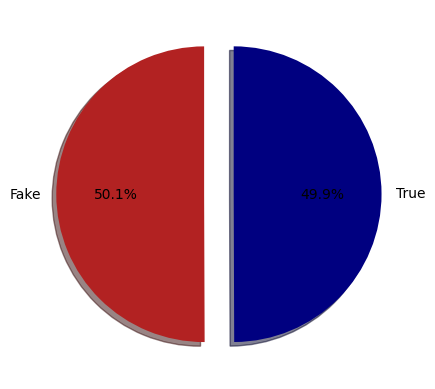

In [ ]:
label_size = [df['label_encoding'].sum(),len(df['label_encoding'])-df['label_encoding'].sum()]
plt.pie(label_size,explode=[0.1,0.1],colors=['firebrick','navy'],startangle=90,shadow=True,labels=['Fake','True'],autopct='%1.1f%%')

checking inbalance data,it got balance data,which is not affect to our model

# Preprocessing

## Data info (Data type,Null value,checking coloumns)

In [ ]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              6335 non-null   int64 
 1   title           6335 non-null   object
 2   text            6335 non-null   object
 3   label           6335 non-null   object
 4   label_encoding  6335 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 247.6+ KB


## Drop Coloumn

In [ ]:
  df.drop("label",axis=1,inplace=True)
  df.head()

,id,title,text,label_encoding
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


In [ ]:
  df.drop("id",axis=1,inplace=True)
  df.head()

,title,text,label_encoding
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


# Modelling

## Train Test Validation Data Split (Divided data into size)                   (Training : 70%,Validation : 20%,Test : 10%)

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.1, random_state=3, stratify=df["label_encoding"])
df_train, df_val = train_test_split(df_train, test_size=0.2, random_state=3, stratify=df_train["label_encoding"])

print(df_train.shape)
print(df_test.shape)
print(df_val.shape)


(4560, 3)
(634, 3)
(1141, 3)


## Train Test Validation Data Split (Insert the data that it want to train,validate,and also testing)

In [ ]:
x_train = ("title : " + df_train["title"] + " [SEP] " + "Content : " + df_train["text"]).tolist()
x_test = ("title : " + df_test["title"] + " [SEP] " + "Content : " + df_test["text"]).tolist()
x_val = ("title : " + df_val["title"] + " [SEP] " + "Content : " + df_val["text"]).tolist()

y_train=(df_train["label_encoding"]).tolist()
y_test=(df_test["label_encoding"]).tolist()
y_val=(df_val['label_encoding']).tolist()

## Loads a pretrained BERT model and tokenizer,also Prepares the model for binary text classification using TensorFlow

In [ ]:
from transformers import TFBertForSequenceClassification
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=2)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

train_encodings = tokenizer(x_train, truncation=True, padding=True,return_tensors="tf",max_length=128)
val_encodings = tokenizer(x_val, truncation=True, padding=True,return_tensors="tf",max_length=128)
test_encodings = tokenizer(x_test, truncation=True, padding=True,return_tensors="tf",max_length=128)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


## Converse the label to TensorFlow Dataset Format

In [ ]:
import tensorflow as tf

'''
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    tf.convert_to_tensor(y_train)
)).shuffle(1000)
#batch(4)

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    tf.convert_to_tensor(y_val)
)).batch(4)

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    tf.convert_to_tensor(y_test)
)).batch(4)
'''
batch_size = 4
epoch = 2
steps_per_epoch = int(len(y_train) / batch_size)
num_train_steps = steps_per_epoch * epoch
init_lr = 1e-5  # sama dengan 0.00001

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    tf.convert_to_tensor(y_train)
)).shuffle(1000).batch(batch_size)

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    tf.convert_to_tensor(y_val)
)).batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    tf.convert_to_tensor(y_test)
)).batch(batch_size)

## Training the data

In [ ]:
optimizer, schedule = create_optimizer(
    init_lr=init_lr,
    num_train_steps=num_train_steps,
    num_warmup_steps=int(0.1 * num_train_steps)
)

model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epoch
)

Epoch 1/2
1140/1140 [==============================] - 224s 153ms/step - loss: 0.2426 - accuracy: 0.8928 - val_loss: 0.1035 - val_accuracy: 0.9641
Epoch 2/2
1140/1140 [==============================] - 163s 143ms/step - loss: 0.0579 - accuracy: 0.9818 - val_loss: 0.0959 - val_accuracy: 0.9693


# Reporting

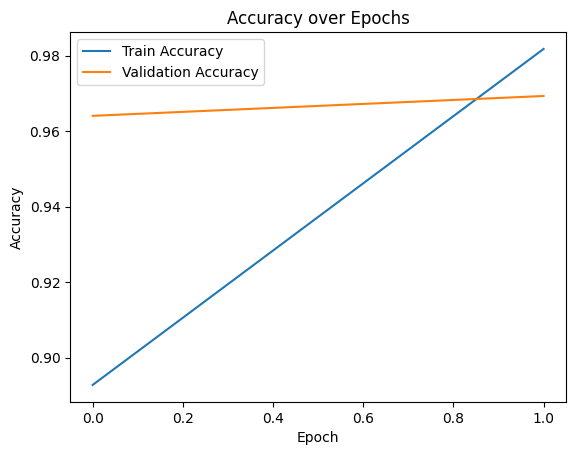

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


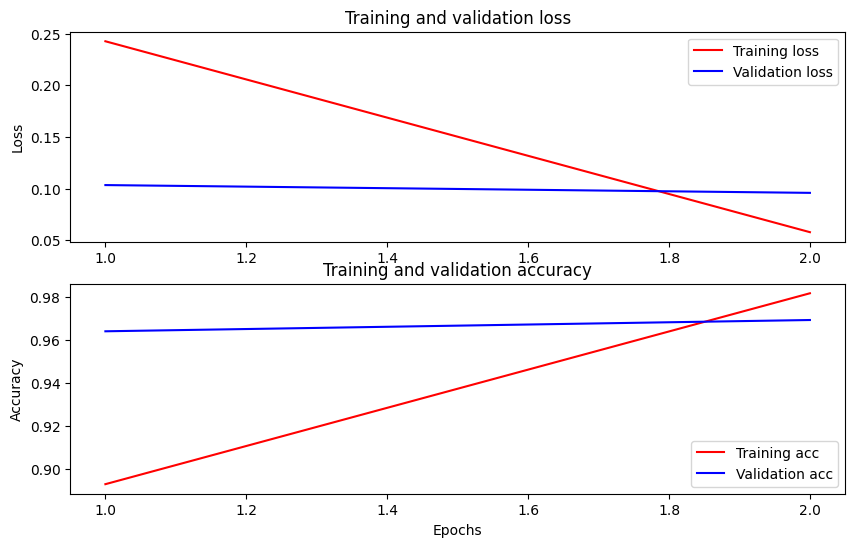

In [ ]:
history_dict = history.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
# Prediksi
preds = model.predict(test_dataset).logits
y_pred = np.argmax(preds, axis=1)

159/159 [==============================] - 11s 49ms/step


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       317
           1       0.96      1.00      0.98       317

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



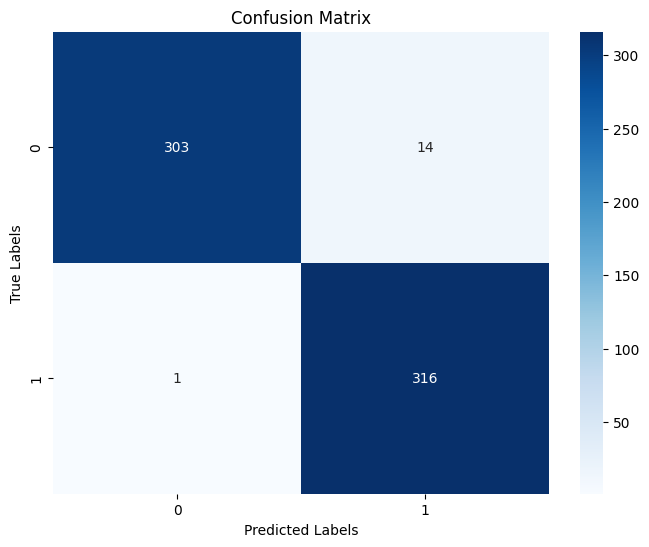

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=True, yticklabels=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()